In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

### Dataset

In [2]:
filepath = '/home/hugo/projetos-doutorado/Appliance-Energy-Prediction/data/energydata_complete.csv'
df = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(df.shape)  # (123, 8)
df = df.drop(labels=['rv1','rv2'], axis=1)
df.tail()

(19735, 28)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000


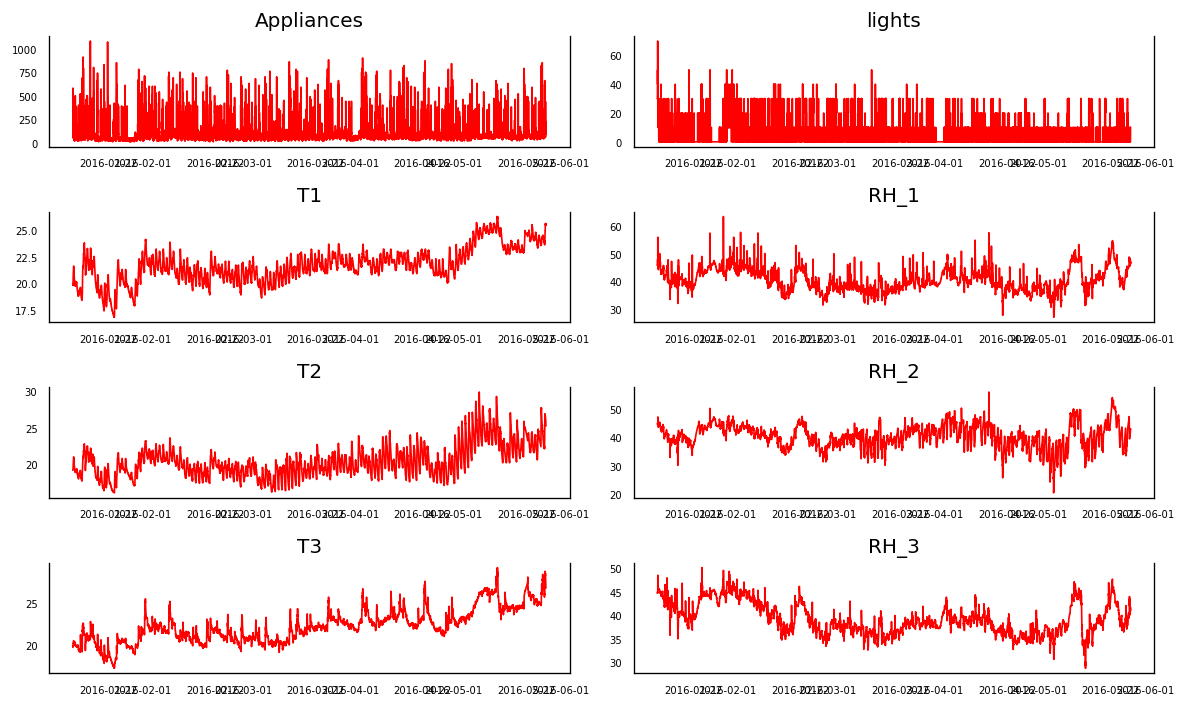

In [3]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### Testing Causation using Granger’s Causality Test

In [4]:
# from statsmodels.tsa.stattools import grangercausalitytests
# maxlag=12
# test = 'ssr_chi2test'
# def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
#     """Check Granger Causality of all possible combinations of the Time series.
#     The rows are the response variable, columns are predictors. The values in the table 
#     are the P-Values. P-Values lesser than the significance level (0.05), implies 
#     the Null Hypothesis that the coefficients of the corresponding past values is 
#     zero, that is, the X does not cause Y can be rejected.

#     data      : pandas dataframe containing the time series variables
#     variables : list containing names of the time series variables.
#     """
#     df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
#     for c in df.columns:
#         for r in df.index:
#             test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
#             p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
#             if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
#             min_p_value = np.min(p_values)
#             df.loc[r, c] = min_p_value
#     df.columns = [var + '_x' for var in variables]
#     df.index = [var + '_y' for var in variables]
#     return df

# grangers_matrix = grangers_causation_matrix(df, variables = df.columns)     

In [5]:
# grangers_matrix

In [6]:
# f, ax = plt.subplots(figsize=(25, 20))
# sns.heatmap(grangers_matrix, cmap='RdYlGn_r', annot=True,linewidths=.5)

### Cointegration Test

<AxesSubplot:>

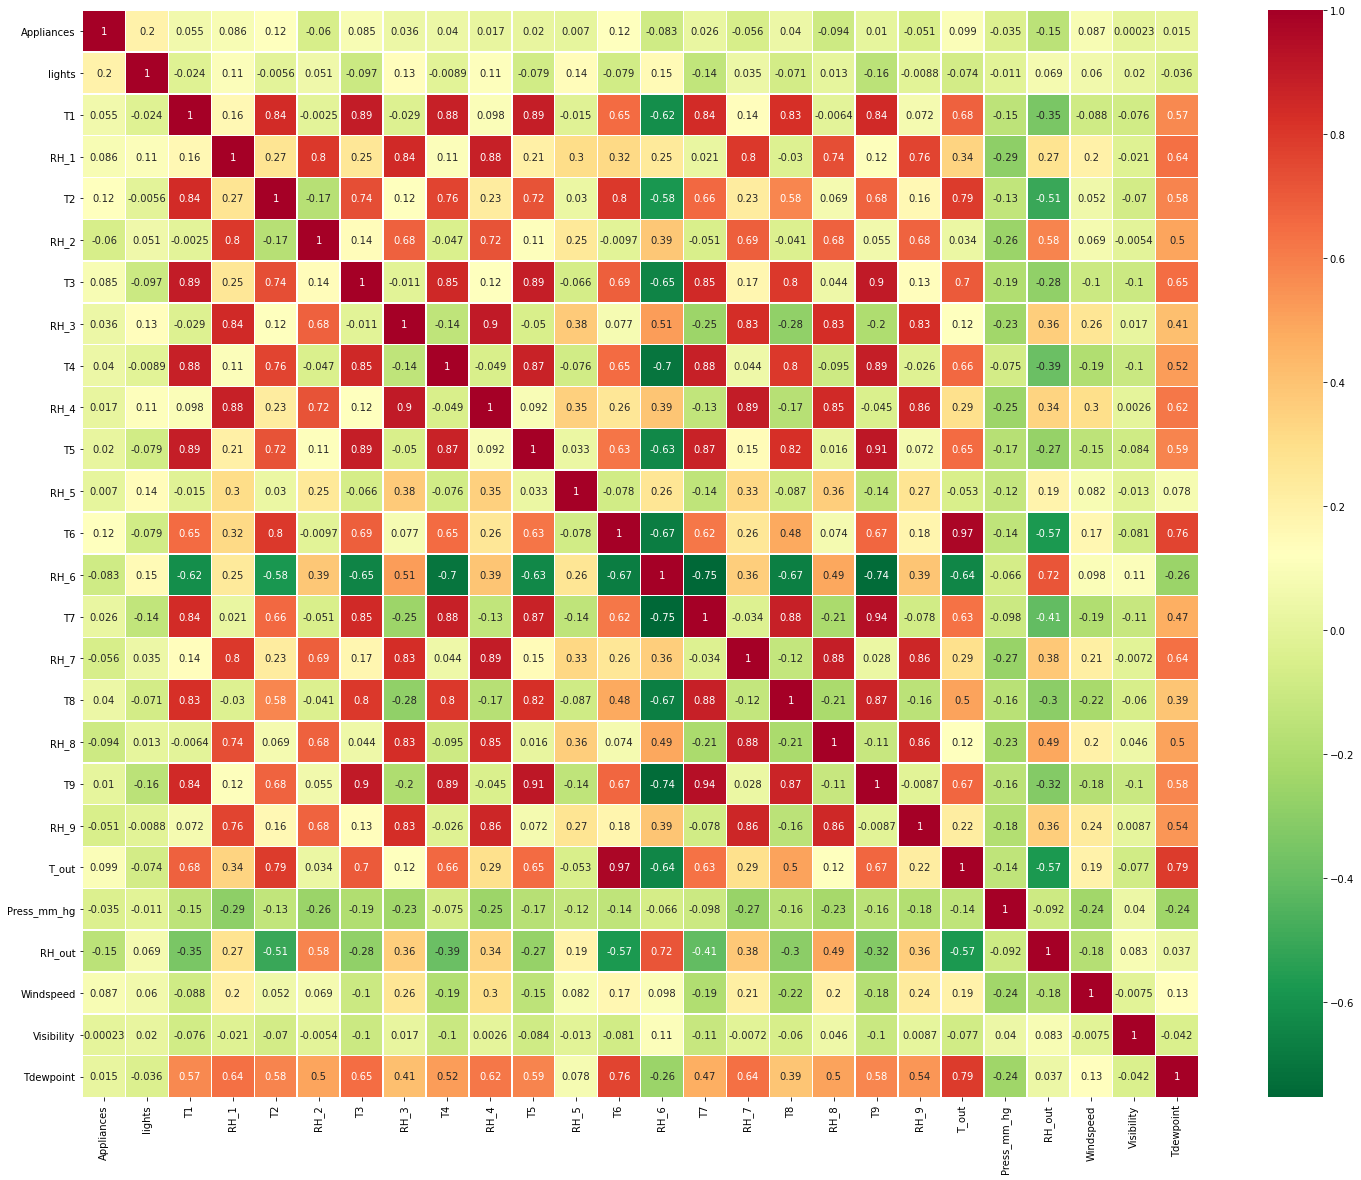

In [7]:
cov_data= df.corr()
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(cov_data, cmap='RdYlGn_r', annot=True,linewidths=.5)

In [8]:
cov_data= df.corr()
cov_data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509


In [9]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/vecm.py:577: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  warnings.warn("Critical values are only available for time series "


Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Appliances ::  11849.96  > nan       =>   False
lights ::  9643.94   > nan       =>   False
T1     ::  8245.57   > nan       =>   False
RH_1   ::  7102.93   > nan       =>   False
T2     ::  6076.93   > nan       =>   False
RH_2   ::  5206.19   > nan       =>   False
T3     ::  4496.06   > nan       =>   False
RH_3   ::  3908.28   > nan       =>   False
T4     ::  3367.16   > nan       =>   False
RH_4   ::  2880.24   > nan       =>   False
T5     ::  2451.58   > nan       =>   False
RH_5   ::  2075.91   > nan       =>   False
T6     ::  1751.68   > nan       =>   False
RH_6   ::  1472.46   > nan       =>   False
T7     ::  1245.95   > 311.1288  =>   True
RH_7   ::  1025.63   > 263.2603  =>   True
T8     ::  831.27    > 219.4051  =>   True
RH_8   ::  653.9     > 179.5199  =>   True
T9     ::  515.01    > 143.6691  =>   True
RH_9   ::  390.79    > 111.7797  =>   True
T_out  ::  273.3     > 83.9383   

In [22]:
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(19731, 26)
(4, 26)


In [23]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [24]:
# ADF Test on each column
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Appliances" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -21.6164
 No. Lags Chosen       = 11
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "lights" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -21.5759
 No. Lags Chosen       = 15
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "T1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level 

    Augmented Dickey-Fuller Test on "T_out" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.3767
 No. Lags Chosen       = 45
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Press_mm_hg" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.7173
 No. Lags Chosen       = 43
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "RH_out" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Leve

In [25]:
df_differenced = df.diff().dropna()
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Appliances" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -29.8659
 No. Lags Chosen       = 42
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "lights" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -29.9861
 No. Lags Chosen       = 45
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "T1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level 

    Augmented Dickey-Fuller Test on "T_out" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -22.5735
 No. Lags Chosen       = 45
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Press_mm_hg" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.505
 No. Lags Chosen       = 42
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "RH_out" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Lev

### KPSS test

In [26]:
# regression='ct'
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, name='', **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Test on "{name}"', "\n   ", '-'*47)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


In [27]:
for name, column in df.iteritems():
    kpss_test(column, name=column.name)
    print('\n')

KPSS Test on "Appliances" 
    -----------------------------------------------
KPSS Statistic: 0.03892801361687985
p-value: 0.1
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "lights" 
    -----------------------------------------------
KPSS Statistic: 4.728576720208184
p-value: 0.01
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


KPSS Test on "T1" 
    -----------------------------------------------
KPSS Statistic: 21.87581707300442
p-value: 0.01
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


KPSS Test on "RH_1" 
    -----------------------------------------------
KPSS Statistic: 2.877921129856753
p-value: 0.01
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


KPSS 

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2041: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2072: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  war

In [28]:
df_differenced = df.diff().dropna()
for name, column in df_differenced.iteritems():
    kpss_test(column, name=column.name)
    print('\n')

KPSS Test on "Appliances" 
    -----------------------------------------------
KPSS Statistic: 0.004728250272411956
p-value: 0.1
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "lights" 
    -----------------------------------------------
KPSS Statistic: 0.006424252966743214
p-value: 0.1
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "T1" 
    -----------------------------------------------
KPSS Statistic: 0.006224805825555264
p-value: 0.1
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "RH_1" 
    -----------------------------------------------
KPSS Statistic: 0.02523338260326237
p-value: 0.1
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test o

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2041: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  war

KPSS Test on "T6" 
    -----------------------------------------------
KPSS Statistic: 0.005136396530797152
p-value: 0.1
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "RH_6" 
    -----------------------------------------------
KPSS Statistic: 0.002085108744131643
p-value: 0.1
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "T7" 
    -----------------------------------------------
KPSS Statistic: 0.008524833810270164
p-value: 0.1
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "RH_7" 
    -----------------------------------------------
KPSS Statistic: 0.019997611156451774
p-value: 0.1
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "T8" 
 

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The

### How to Select the Order (P) of VAR model

In [29]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'


Lag Order = 1
AIC :  -90.54855581320692
BIC :  -90.26786795817225
FPE :  4.734366614512718e-40
HQIC:  -90.45666372059412 

Lag Order = 2
AIC :  -91.42301944648885
BIC :  -90.87201519886452
FPE :  1.974637049705538e-40
HQIC:  -91.2426302462617 

Lag Order = 3
AIC :  -91.73912427829066
BIC :  -90.91777971069828
FPE :  1.439478008858676e-40
HQIC:  -91.47022970237467 

Lag Order = 4
AIC :  -91.98256555249752
BIC :  -90.89085673418452
FPE :  1.1284452268824464e-40
HQIC:  -91.62515733161979 

Lag Order = 5
AIC :  -92.17414846134011
BIC :  -90.81205145817908
FPE :  9.31704413879265e-41
HQIC:  -91.72821832502916 

Lag Order = 6
AIC :  -92.39882142362437
BIC :  -90.76631229811242
FPE :  7.442271607638727e-41
HQIC:  -91.86436110020982 

Lag Order = 7
AIC :  -93.68113685477809
BIC :  -91.7781916660362
FPE :  2.0644540234279319e-41
HQIC:  -93.05813807139049 

Lag Order = 8
AIC :  -93.72726078533651
BIC :  -91.55385558910886
FPE :  1.9714092548240662e-41
HQIC:  -93.01571526790707 

Lag Order = 9
AI

In [30]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-75.48,-75.47,1.661e-33,-75.47
1,-90.56,-90.28,4.696e-40,-90.46
2,-91.43,-90.88,1.958e-40,-91.25
3,-91.75,-90.93,1.426e-40,-91.48
4,-91.99,-90.90,1.117e-40,-91.63
5,-92.18,-90.82,9.218e-41,-91.74
6,-92.41,-90.78,7.358e-41,-91.88
7,-93.69,-91.79*,2.041e-41,-93.07*
8,-93.74,-91.57,1.948e-41,-93.03
9,-93.78,-91.33,1.873e-41,-92.98


In [31]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     22:51:44
--------------------------------------------------------------------
No. of Equations:         26.0000    BIC:                   -90.8909
Nobs:                     19730.0    HQIC:                  -91.6252
Log likelihood:           182251.    FPE:                1.12845e-40
AIC:                     -91.9826    Det(Omega_mle):     9.82986e-41
--------------------------------------------------------------------
Results for equation Appliances
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.096411         0.476491            0.202           0.840
L1.Appliances         -0.170025         0.007124          -23.865           0.000
L1.lights              0.412242         0.101098   

In [32]:
def adjust(val, length= 6): return str(val).ljust(length)

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Appliances : 2.02
lights : 2.01
T1     : 2.04
RH_1   : 2.03
T2     : 2.01
RH_2   : 2.0
T3     : 2.02
RH_3   : 2.02
T4     : 2.01
RH_4   : 2.01
T5     : 2.01
RH_5   : 2.0
T6     : 2.0
RH_6   : 2.0
T7     : 2.01
RH_7   : 2.0
T8     : 2.01
RH_8   : 2.0
T9     : 2.01
RH_9   : 2.0
T_out  : 2.03
Press_mm_hg : 2.0
RH_out : 2.04
Windspeed : 2.06
Visibility : 2.06
Tdewpoint : 2.03


In [33]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[-1.00000000e+01,  0.00000000e+00, -6.66666667e-02,
        -6.00000000e-02, -1.36000000e-01,  5.42857143e-02,
        -6.66666667e-02,  6.00000000e-02,  0.00000000e+00,
         0.00000000e+00,  3.00000000e-02, -7.33333333e-02,
        -6.00000000e-01,  0.00000000e+00,  5.71428571e-02,
        -8.57142857e-02,  0.00000000e+00, -2.84000000e-01,
         0.00000000e+00,  0.00000000e+00, -1.33333333e-01,
         0.00000000e+00,  3.33333333e-01,  1.66666667e-01,
         8.33333333e-01, -3.33333333e-02],
       [ 1.80000000e+02,  1.00000000e+01,  0.00000000e+00,
         9.66666667e-02, -1.25428571e-01,  6.88571429e-01,
        -8.33333333e-02,  4.66666667e-01,  0.00000000e+00,
         1.40000000e-01,  0.00000000e+00, -6.00000000e-02,
        -5.70000000e-01,  0.00000000e+00, -1.71428571e-02,
        -1.42857143e-02,  0.00000000e+00, -1.30000000e-01,
         0.00000000e+00,  0.00000000e+00, -1.33333333e-01,
         0.00000000e+00,  3.33333333e-01,  1.66666667e-01,
         8.33

In [34]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Appliances_2d,lights_2d,T1_2d,RH_1_2d,T2_2d,RH_2_2d,T3_2d,RH_3_2d,T4_2d,RH_4_2d,...,T8_2d,RH_8_2d,T9_2d,RH_9_2d,T_out_2d,Press_mm_hg_2d,RH_out_2d,Windspeed_2d,Visibility_2d,Tdewpoint_2d
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:30:00,-68.105759,-0.174840,-0.026187,0.064232,-0.181937,0.039327,-0.045167,0.042730,0.044545,0.034335,...,0.030103,0.112109,-0.021781,-0.029720,-0.200009,0.006787,0.534041,0.092080,0.574022,-0.063206
2016-05-27 17:40:00,-39.726854,0.091728,-0.003696,0.199808,-0.145375,0.243660,0.011180,0.159085,0.029515,-0.025895,...,0.032293,0.053112,-0.012016,-0.013117,-0.252501,0.010173,0.681725,0.027789,0.224065,-0.087988
2016-05-27 17:50:00,24.981230,-0.769005,0.001097,-0.095652,-0.137438,0.249088,0.008749,0.126954,0.009511,-0.057491,...,0.021910,0.050129,-0.016717,-0.022295,-0.309276,0.016609,0.914379,-0.024547,0.192748,-0.097421
2016-05-27 18:00:00,20.386578,-0.209759,-0.006492,-0.187673,-0.140404,0.166973,0.000306,0.032493,-0.008294,-0.070000,...,0.025657,0.074622,-0.019522,-0.006974,-0.345682,0.021218,1.100091,-0.070211,0.045728,-0.097810


In [36]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
                   'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

KeyError: "None of [Index(['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',\n       'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast'],\n      dtype='object')] are in the [columns]"